In [2]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

 
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Number of Estimators: 1 Accuracy: 0.711764705882353
Number of Estimators: 11 Accuracy: 0.7647058823529411
Number of Estimators: 21 Accuracy: 0.7764705882352941
Number of Estimators: 31 Accuracy: 0.7823529411764706
Number of Estimators: 41 Accuracy: 0.7470588235294118
Number of Estimators: 51 Accuracy: 0.7352941176470589
Number of Estimators: 61 Accuracy: 0.7764705882352941
Number of Estimators: 71 Accuracy: 0.7823529411764706
Number of Estimators: 81 Accuracy: 0.7588235294117647
Number of Estimators: 91 Accuracy: 0.7588235294117647
Melhor n: 31  com acurácia: 0.7823529411764706


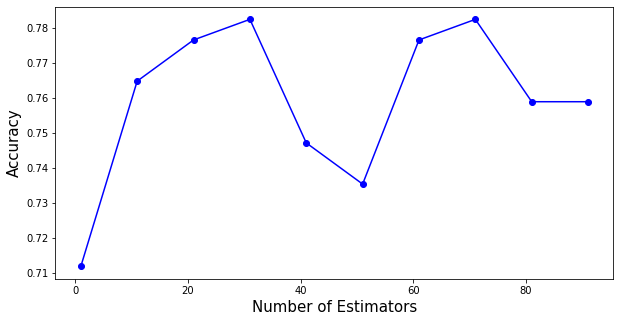

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n, criterion='gini')
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# cria o modelo com número máximo de níveis max_depth
model = RandomForestClassifier(n_estimators = 31,criterion = 'gini')
# ajusta aos dados de treinamento
model.fit(x_train,y_train)
# faz a predição usando os dados de teste
y_pred = model.predict(x_test) 
# calcula a acurácia
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7470588235294118


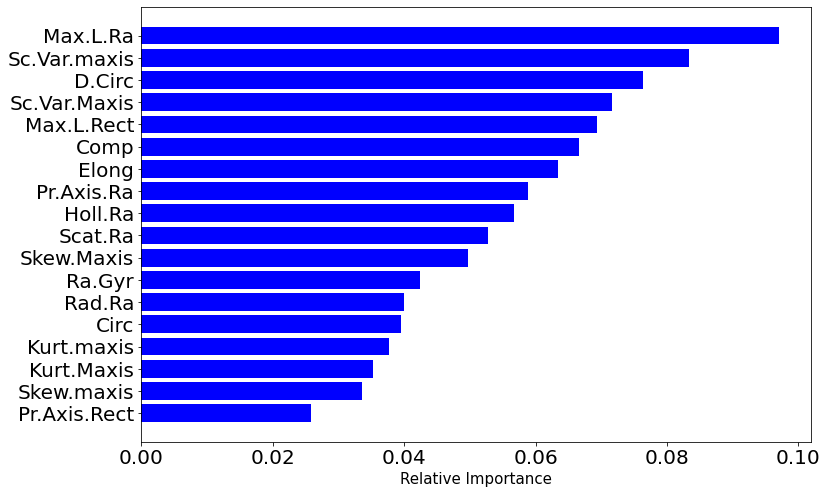

In [27]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()